In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("C:/Users/Suraj/Downloads/automobile.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


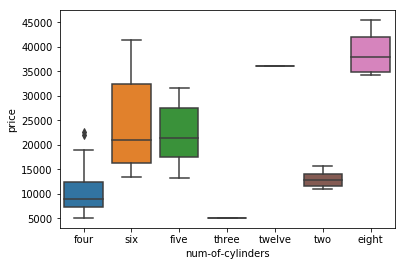

In [5]:
sns.boxplot(x='num-of-cylinders', y='price', data=df)

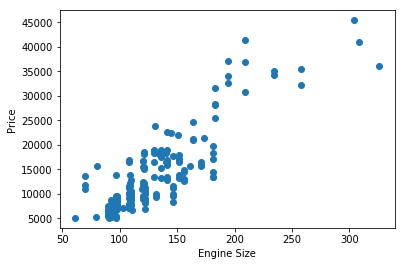

In [7]:
plt.scatter(df['engine-size'],df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [8]:
df_temp = df[['num-of-doors','body-style','price']]

In [9]:
df_group = df_temp.groupby(['num-of-doors', 'body-style'], as_index=False).mean()

In [10]:
print (df_group)

  num-of-doors   body-style         price
0         four    hatchback   8372.000000
1         four        sedan  14490.687500
2         four        wagon  12371.960000
3          two  convertible  21890.500000
4          two      hardtop  22208.500000
5          two    hatchback  10230.793103
6          two        sedan  14283.000000


In [11]:
df_pivot = df_group.pivot(index = 'body-style', columns = 'num-of-doors')

In [13]:
print (df_pivot)

                   price              
num-of-doors        four           two
body-style                            
convertible          NaN  21890.500000
hardtop              NaN  22208.500000
hatchback      8372.0000  10230.793103
sedan         14490.6875  14283.000000
wagon         12371.9600           NaN


In [15]:
temp_df = df[['make', 'price']].groupby(['make'])
temp_df.head()

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0
5,audi,15250.0
6,audi,17710.0
7,audi,18920.0
9,bmw,16430.0
10,bmw,16925.0


In [16]:
stats.f_oneway(temp_df.get_group('audi')['price'], temp_df.get_group('volvo')['price'])

F_onewayResult(statistic=0.014303241552631388, pvalue=0.9063901597143602)

In [17]:
stats.f_oneway(temp_df.get_group('jaguar')['price'], temp_df.get_group('honda')['price'])

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

In [18]:
correlation_matrix = df.corr()

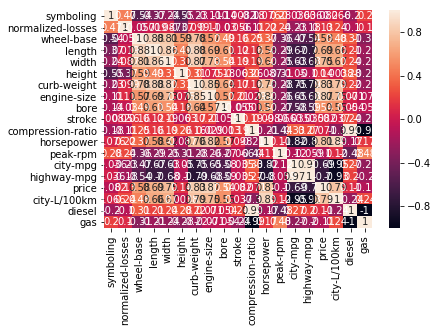

In [19]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

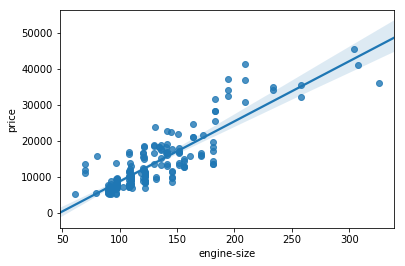

In [20]:
sns.regplot(x='engine-size',y='price',data=df)